<a href="https://colab.research.google.com/github/APARNAGADHIYA/IOT_Class/blob/main/Implementing_Gesture_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
jump =pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/jump_set.csv")
run =pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/run_set.csv")
squat =pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/squat_set.csv")
walk =pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/walk_set.csv")
other =pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/other_set.csv")


In [ ]:
jump.shape

(11900, 6)

In [ ]:
run.shape

(11900, 6)

In [ ]:
GESTURES=["squat_set","jump_set","walk_set","run_set","other_set"]

In [ ]:
SAMPLES_PER_GESTURE=119
NUM_GESTURES =len(GESTURES)

In [ ]:
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
dft=[jump,run,squat,walk,other]
inputs =[]
outputs =[]

In [ ]:
#Read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture=GESTURES[gesture_index]
  print("Processing index",{gesture_index},"for gesture",{gesture},".")
  output=ONE_HOT_ENCODED_GESTURES[gesture_index]
  print(output)
  df=dft[gesture_index]

  # Calculate the number of gesture recorings in the file
  num_recordings= int(df.shape[0]/SAMPLES_PER_GESTURE)
  print("\t There are",{num_recordings}, "recordings of the",{gesture},"gesture.")

  for i in range (num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i*SAMPLES_PER_GESTURE + j
      # Normalise the input data between 0 to 1
      # Acceleration is betwwen: -4 to +4
      # Gyroscope is between: -2000 to +2000
      tensor += [(df['aX'][index] + 4) / 8,
                (df['aY'][index] + 4) / 8,
                (df['aZ'][index] + 4) / 8,
                (df['gX'][index] + 2000) / 4000,
                (df['gY'][index] + 2000) / 4000,
                (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)  
# convert  the list to numpy array
inputs = np.array(inputs) 
outputs = np.array(outputs)

print("Data Set Parsing and Preparation Complete")

Processing index {0} for gesture {'squat_set'} .
[1. 0. 0. 0. 0.]
	 There are {100} recordings of the {'squat_set'} gesture.
Processing index {1} for gesture {'jump_set'} .
[0. 1. 0. 0. 0.]
	 There are {100} recordings of the {'jump_set'} gesture.
Processing index {2} for gesture {'walk_set'} .
[0. 0. 1. 0. 0.]
	 There are {100} recordings of the {'walk_set'} gesture.
Processing index {3} for gesture {'run_set'} .
[0. 0. 0. 1. 0.]
	 There are {100} recordings of the {'run_set'} gesture.
Processing index {4} for gesture {'other_set'} .
[0. 0. 0. 0. 1.]
	 There are {100} recordings of the {'other_set'} gesture.
Data Set Parsing and Preparation Complete


In [ ]:
input_shape = inputs[0].shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(512,input_shape=input_shape, activation="relu"),
     tf.keras.layers.Dense(256, activation="relu"),
     #tf.keras.layers.Dense(128, activation="relu"),
     # tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dropout(.1),
     # tf.keras.layers.Dense(256, activation="relu"),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dropout(.1),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(5,activation='sigmoid')
                             
])

In [ ]:
model.compile(optimizer="adam",
              loss= 'categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               366080    
_________________________________________________________________
dense_65 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

In [ ]:
model.fit(X_train, y_train, 
          epochs= 100, 
          validation_split= 0.2, 
          batch_size= 10, 
          verbose=True)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 1.6554 - accuracy: 0.2489 - val_loss: 1.6427 - val_accuracy: 0.2250
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6873 - accuracy: 0.1977 - val_loss: 1.6039 - val_accuracy: 0.1750
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6306 - accuracy: 0.2150 - val_loss: 1.6275 - val_accuracy: 0.1625
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6104 - accuracy: 0.2564 - val_loss: 1.6095 - val_accuracy: 0.3625
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6087 - accuracy: 0.2439 - val_loss: 1.6057 - val_accuracy: 0.3375
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.5831 - accuracy: 0.2602 - val_loss: 1.6366 - val_accuracy: 0.1625
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.5877 - accuracy: 0.2529 - val_loss: 1.5825 - val_accuracy: 0.2125
Epoch 8/100
3

In [ ]:
predictions = model.predict(X_test)

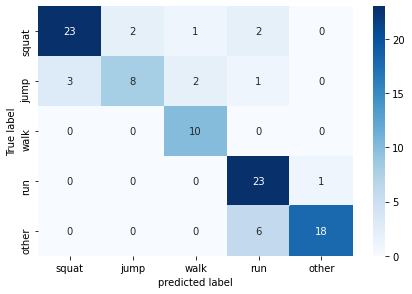

In [ ]:
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = ['squat', 'jump','walk','run','other']
figure = plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()